In [13]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

In [14]:
device = qml.device('qiskit.aer', wires=1, backend='qasm_simulator')
params = np.random.normal(0,np.pi/2, 3)
params = Variable(torch.tensor(params), requires_grad=True)

@qml.qnode(device, interface="torch")
def circuit(params, M=None):
    qml.Hadamard(wires=0)
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=0)
    qml.RZ(params[2], wires=0)
    
    return qml.expval(qml.Hermitian(M, wires=[0]))
fig, ax = qml.draw_mpl(circuit, decimals=2)(params)
plt.show()

AttributeError: partially initialized module 'qiskit' has no attribute '_accelerate' (most likely due to a circular import)

In [8]:
import random
a = random.random()
b = (1-a**2)**0.5
target_state = np.array([a, b])
target_op = np.outer(target_state.conj(), target_state)
target_op = torch.tensor(target_op)
print(target_state)
print(target_op)

[0.73636663 0.67658273]
tensor([[0.5422, 0.4982],
        [0.4982, 0.4578]], dtype=torch.float64)


In [9]:
def cost(params):
    L = (1-(circuit(params, M=target_op)))**2
    return L

In [10]:
opt = torch.optim.Adam([params], lr=0.1)
best_loss = 1*cost(params)
best_params = 1*params

NameError: name 'params' is not defined

In [ ]:
fidelity=[]
epochs=[]
for epoch in range(25):
    opt.zero_grad()
    loss = cost(params)
    print(epoch, loss.item())
    loss.backward()
    opt.step()
    if loss < best_loss:
        best_loss = 1*loss
        best_params = 1*params
    f = circuit(best_params, M=target_op).item()
    epochs.append(epoch)
    fidelity.append(f)

0 6.103515625e-05
1 9.5367431640625e-05
2 0.00011539459228515625
3 9.5367431640625e-05
4 8.58306884765625e-06
5 4.673004150390625e-05
6 0.00011539459228515625
7 2.384185791015625e-05
8 8.58306884765625e-06
9 8.58306884765625e-06
10 3.4332275390625e-05
11 9.5367431640625e-07
12 9.5367431640625e-07
13 9.5367431640625e-07
14 9.5367431640625e-07
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 3.814697265625e-06
23 0.0
24 0.0


In [ ]:
print(circuit(best_params, M=target_op).item())

0.9990234375


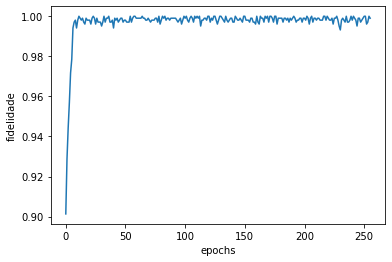

In [ ]:
plt.plot(epochs, fidelity)
plt.xlabel('epochs')
plt.ylabel('fidelidade')
plt.show()

Para estados puros, a fidelidade é igual ao quadrado do valor esperado.

valor esperado pode ser calculado diretamente do VQA.

In [5]:
def fidelidade(target_op):
    return circuit(best_params, M=target_op).item()
def init_state_params():
    params = np.random.normal(0,np.pi/2, 3)
    params = Variable(torch.tensor(params), requires_grad=True)
    a = random.random()
    b = (1-a**2)**0.5
    target_state = np.array([a, b])
    target_op = np.outer(target_state.conj(), target_state)
    target_op = torch.tensor(target_op)
    return target_op, params

@qml.qnode(device, interface="torch")
def circuit(params, M=None):
    qml.Hadamard(wires=0)
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=0)
    qml.RZ(params[2], wires=0)
    
    return qml.expval(qml.Hermitian(M, wires=[0]))

def cost(params,target_op):
    L = (1-(circuit(params, M=target_op)))**2
    return L

def train(params,target_op):
    opt = torch.optim.Adam([params], lr=0.1)
    best_loss = 1*cost(params,target_op)
    best_params = 1*params
    for epoch in range(32):
        opt.zero_grad()
        loss = cost(params,target_op)
        print(epoch, loss.item())
        loss.backward()
        opt.step()
        if loss < best_loss:
            best_loss = 1*loss
            best_params = 1*params
    return best_params, best_loss


NameError: name 'device' is not defined

In [4]:
fidelidade_media=0
for i in range(10):
    target_op, params = init_state_params()
    best_params, best_loss = train(params,target_op)
    fidelidade_media += fidelidade(target_op)
fidelidade_media = fidelidade_media/100
print(fidelidade_media)

NameError: name 'init_state_params' is not defined

In [3]:
x=np.linspace(0,len(fidelity),len(fidelity))
plt.plot(x, fidelity)
plt.xlabel('estados puros')
plt.ylabel('fidelidade')
plt.show()

NameError: name 'fidelity' is not defined